### 과대적합과 과소적합
<img src="../images/4.png" width="500" height="600" />

#### 과대적합(overfitting)
* 훈련데이터에만 잘 맞고 테스트데이터에는 낮은 정답률이 나오는 경우

<img src="../images/1.png" width="500" height="" />

#### 과소적합(underfitting)
* 훈련이 제대로 이루어지지 않아 테스트 데이터보다 훈련데이터의 정답률이 낮은 경우
* 훈련, 테스트데이터 모두 정답률이 낮은 경우
* 훈련데이터의 개수가 적을 경우

<img src="../images/2.png" width="500" height="" />

---ht="" />

---

### 스케일링
* 수치형 데이터들의 값의 범위가 클 경우 사용한다.(연산 속도 증가)
    - 예를 들어 주식의 가격을 생각했을 경우 100원의 1%와 100000원의 1%를 계산하고자 한다면 같은 1%연산이지만 숫자가 클 경우 연산속도에 영향을 미치게 된다.
* 서로 다른 변수의 값 범위를 일정한 수준으로 맞추고자 하는 경우
* 대표적 스케일링 클래스는 StandardScaler, MinMaxScaler이 있다
* 사용 이유
    - 연산속도를 올릴 수 있다
    - 확률을 높일 수 있다
    - 과대, 과소적합을 조금은 해결할 수 있다
* 참고
    - 이상치가 있을 경우 범위의 차이가 커지게 되므로 이상치는 제거해야 한다
    - RandomForest는 따로 스케일링 할 필요가 없다.(tree계열은 따로 스케일 할 필요가 없다)

#### StandardScaler(label값은 스케일 하지 않는다)
* 사이킷런에서 서포트벡터머신, 선형회귀, 로지스틱 회귀에 적용하는 것이 예측 성능 향상에 중요한 요소가 된다.
* 각 특성의 평균을 0, 편차를 1로 변경하여 정규분포로 만드는 것이다
    - 편차(deviation)는 예측값과 평균의 차이
    
<img src="../images/3.png" width="" height="" />

#### MinMaxScaler(label값은 스케일 하지 않는다)
* 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경
* k-means, k-nearest neighbor등의 알고리즘에 좋은 성능을 보인다은 성능을 보인다

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 가상의 영화 평점 데이터
movie = {'daum':[2,4,6,8,10], 'naver':[1,2,3,4,5]}
mv = pd.DataFrame(movie)
mv

daum  naver
0     2      1
1     4      2
2     6      3
3     8      4
4    10      5

In [13]:
# standardscaler 를 사용해서
# 두 데이터 간의 범위를 줄인다
st = StandardScaler()
scaled = st.fit_transform(mv)
mv = pd.DataFrame(data = scaled, columns=['daum', 'naver'])
mv

daum         naver
0 -1.414214e+00 -1.414214e+00
1 -7.071068e-01 -7.071068e-01
2  4.440892e-17  4.440892e-17
3  7.071068e-01  7.071068e-01
4  1.414214e+00  1.414214e+00

In [12]:
# round() : 소숫점 범위를 잘라준다
round(scaled.std(), 2)

1.0

In [16]:
from sklearn.preprocessing import MinMaxScaler
mv = pd.DataFrame(movie)
mv

daum  naver
0     2      1
1     4      2
2     6      3
3     8      4
4    10      5

In [18]:
# MinMaxScaler 를 사용해
# 다른 두 값을 0 ~ 1 사이의 값으로
# 바꿔준다
m = MinMaxScaler()
min_max_mv = m.fit_transform(mv)
pd.DataFrame(min_max_mv, columns=['d', 'b'])

d     b
0  0.00  0.00
1  0.25  0.25
2  0.50  0.50
3  0.75  0.75
4  1.00  1.00

In [19]:
df = pd.read_csv("../data_set/5.스케일링/bank_train_clean.csv")
df.head()

age  duration  campaign  pdays  previous  y
0   58       261         1     -1         0  0
1   44       151         1     -1         0  0
2   33        76         1     -1         0  0
3   47        92         1     -1         0  0
4   33       198         1     -1         0  0

In [20]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'y'], dtype='object')

In [21]:
features = ['age', 'duration', 'campaign', 'pdays', 'previous']
label = 'y'

X, y = df[features], df[label]

In [22]:
from sklearn.model_selection import train_test_split

# 학습용 70%, 테스트용 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
from sklearn.ensemble import RandomForestClassifier

# 머신 생성
rfc = RandomForestClassifier()

# 머신 학습
rfc.fit(X_train, y_train);

print( "학습 데이터 : ", rfc.score(X_train, y_train) )

# 학습된 머신 테스트 결과
print( "test 데이터 : ", rfc.score(X_test, y_test) )

# 학습 데이터의 결과와 테스트 결과의 차이가 커지면
# 과적합 되었다라고 말한다

학습 데이터 :  0.9923847442095617
test 데이터 :  0.8815246240047184


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# 머신 생성
kn = KNeighborsClassifier()

# 머신 학습
kn.fit(X_train, y_train)

print( "학습 데이터 : ", kn.score(X_train, y_train) )

# 학습된 머신 테스트 결과
print( "test 데이터 : ", kn.score(X_test, y_test) )

# 학습 데이터와 test 데이터 테스트 결과의
# 차이 폭이 적으므로 좋은 알고리즘이다....

학습 데이터 :  0.9139570891395709
test 데이터 :  0.8846210557357712


In [30]:
# 데이터 스케일링
sc = StandardScaler()
sc.fit( X )
X2 = sc.transform( X )
X2

array([[ 1.60696496,  0.0110161 , -0.56935064, -0.41145311, -0.25194037],
       [ 0.28852927, -0.41612696, -0.56935064, -0.41145311, -0.25194037],
       [-0.74738448, -0.70736086, -0.56935064, -0.41145311, -0.25194037],
       ...,
       [ 2.92540065,  3.37379688,  0.72181052,  1.43618859,  1.05047333],
       [ 1.51279098,  0.97014641,  0.39902023, -0.41145311, -0.25194037],
       [-0.37068857,  0.39932797, -0.24656035,  1.4761376 ,  4.52357654]])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)

In [35]:
# 머신 생성
rfc = RandomForestClassifier()

# 머신 학습
rfc.fit(X_train, y_train);

print( "학습 데이터 : ", rfc.score(X_train, y_train) )

# 학습된 머신 테스트 결과
print( "test 데이터 : ", rfc.score(X_test, y_test) )

# 스케일링된 데이터로 다시 테스트

학습 데이터 :  0.9919423642051379
test 데이터 :  0.8757003833677381


In [36]:
# 머신 생성
kn = KNeighborsClassifier()

# 머신 학습
kn.fit(X_train, y_train)

print( "학습 데이터 : ", kn.score(X_train, y_train) )

# 학습된 머신 테스트 결과
print( "test 데이터 : ", kn.score(X_test, y_test) )

# 스케일링된 데이터로 다시 테스트

학습 데이터 :  0.9128195405567668
test 데이터 :  0.8824830433500442


### 스케일링을 사용하면 과적합을 줄여줄 수도 있다

In [41]:
# fit_transform() 을 사용하여 스케일링
X2 = m.fit_transform( X )
X2

array([[0.51948052, 0.05307035, 0.        , 0.        , 0.        ],
       [0.33766234, 0.03070354, 0.        , 0.        , 0.        ],
       [0.19480519, 0.01545344, 0.        , 0.        , 0.        ],
       ...,
       [0.7012987 , 0.22915819, 0.06451613, 0.21215596, 0.01090909],
       [0.50649351, 0.10329402, 0.0483871 , 0.        , 0.        ],
       [0.24675325, 0.07340382, 0.01612903, 0.21674312, 0.04      ]])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)

In [39]:
# 머신 생성
rfc = RandomForestClassifier()

# 머신 학습
rfc.fit(X_train, y_train);

print( "학습 데이터 : ", rfc.score(X_train, y_train) )

# 학습된 머신 테스트 결과
print( "test 데이터 : ", rfc.score(X_test, y_test) )

# 스케일링된 데이터로 다시 테스트

학습 데이터 :  0.9916895756311814
test 데이터 :  0.8786493659687408


In [40]:
# 머신 생성
kn = KNeighborsClassifier()

# 머신 학습
kn.fit(X_train, y_train)

print( "학습 데이터 : ", kn.score(X_train, y_train) )

# 학습된 머신 테스트 결과
print( "test 데이터 : ", kn.score(X_test, y_test) )

# 스케일링된 데이터로 다시 테스트

학습 데이터 :  0.9158846020159889
test 데이터 :  0.8817457976997936


In [43]:
# corr() : 데이터 간의 상관관계를 확인
df.corr()

age  duration  campaign     pdays  previous         y
age       1.000000 -0.004648  0.004760 -0.023758  0.001288  0.025155
duration -0.004648  1.000000 -0.084570 -0.001565  0.001203  0.394521
campaign  0.004760 -0.084570  1.000000 -0.088628 -0.032855 -0.073172
pdays    -0.023758 -0.001565 -0.088628  1.000000  0.454820  0.103621
previous  0.001288  0.001203 -0.032855  0.454820  1.000000  0.093236
y         0.025155  0.394521 -0.073172  0.103621  0.093236  1.000000

<Axes: >

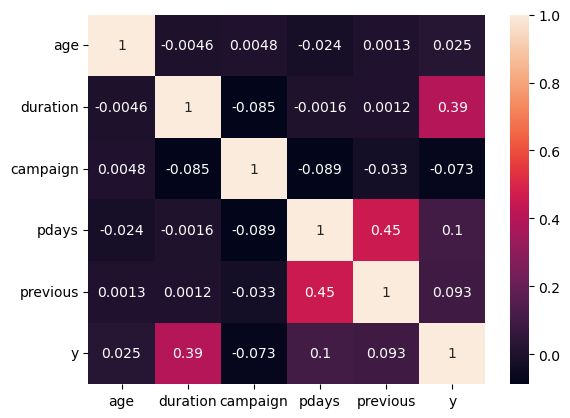

In [45]:
import seaborn as sns

# annot = True : 상관관계 숫자를 출력
sns.heatmap( df.corr(), annot=True )

In [55]:
# features = ['age', 'duration', 'campaign', 'pdays', 'previous']
# features = ['age', 'duration', 'campaign', 'previous']
# features = ['age', 'campaign', 'previous']
features = ['age', 'campaign', 'previous']
label = 'y'
X, y = df[features], df[label]

sc = StandardScaler()
sc.fit( X )
X_scaler = sc.transform( X )

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3)

In [56]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train);
print( "학습 데이터 : ", rfc.score(X_train, y_train) )
print( "test 데이터 : ", rfc.score(X_test, y_test) )

kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
print( "학습 데이터 : ", kn.score(X_train, y_train) )
print( "test 데이터 : ", kn.score(X_test, y_test) )

학습 데이터 :  0.8956615160994723
test 데이터 :  0.8768799764081392
학습 데이터 :  0.8799886245141719
test 데이터 :  0.8695812444706577
